In [7]:
%load_ext autoreload
%autoreload 2
import os

from util import experiment, plot

log_dir = 'new_experiment_log/'
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
# dataset = 'law'
# eps = 0.2
# rho_list = [[0.0, 0.06*i] for i in range(8)]
# rho = [0.0, 0.2]

dataset = 'german'
eps = 0.06
rho_list = [[0.05*i, 0] for i in range(10)]
rho = [0.2, 0.0]


# dataset = 'COMPAS'
# eps = 0.1
# rho_list = [[0.06*i, 0.06*i] for i in range(8)]
# rho = [0.15, 0.15]


# eps_list = [0.02 * i for i in range(1, 11)]


frac = 1
# eval_objective = 'test_tau'
eval_objective = 'test_rho_est_err'
criteria = 'DP'
classifier = 'Agarwal'
trials = 3
include_sensible = False
filename = log_dir+'all_data_'+dataset+','+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+','+eval_objective+'.pickle'
learner_name = 'lsq'
mode = 'four'
verbose = False
all_data = experiment(dataset, frac, eval_objective, eps, rho_list, rho, eps_list, criteria, classifier, trials, include_sensible, filename, learner_name, mode, verbose)


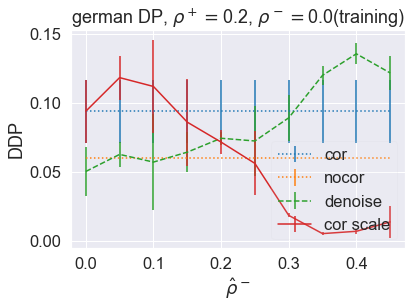

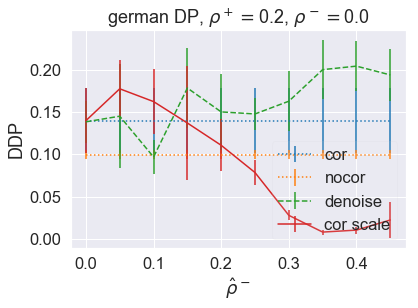

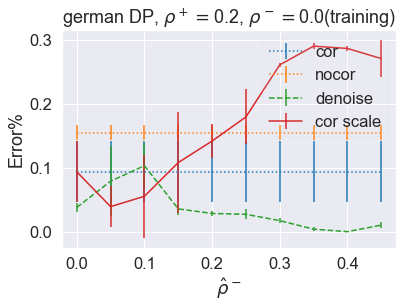

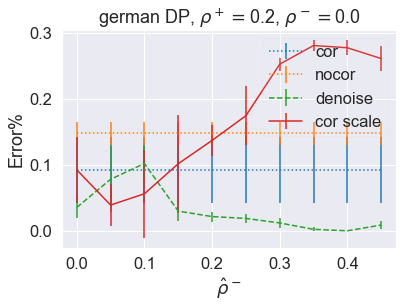

In [89]:
plot(filename, eval_objective, save=True)

In [ ]:
dataset = 'german'
rho = [0.2, 0.0]
frac = 1
# eval_objective = 'test_tau'
eval_objective = 'test_rho_est_err'
criteria = 'DP'
classifier = 'Agarwal'
trials = 3
include_sensible = False
filename = log_dir+'all_data_'+dataset+','+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+','+eval_objective+'.pickle'

plot(filename, eval_objective, save=False)